In [1]:
!pip install pydub
!pip install librosa

import os
import pandas as pd

from pydub import AudioSegment

# Mount Google Drive (if needed) to access files
from google.colab import drive
drive.mount('/content/drive')

!cd drive/MyDrive/Project

Mounted at /content/drive


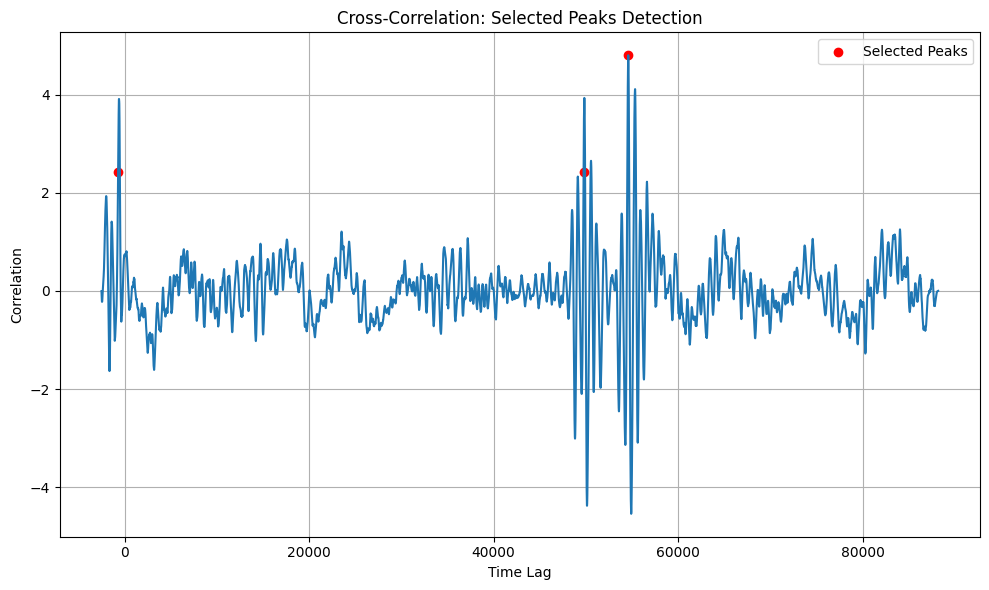

Segment 1: Duration 0.057 seconds
Segment 2: Duration 0.041 seconds
Segment 3: Duration 0.057 seconds


In [ ]:
### The most important - ETHAN


import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy

def extract_segments(audio, peak_positions, template_length):
    segments = []
    for peak in peak_positions:
        start_sample = max(0, peak - template_length + 1)
        end_sample = min(len(audio), peak + 1)
        segment = audio[start_sample:end_sample]
        segments.append(segment)
    return segments

def detect_top_peaks(audio_file, template_file, num_peaks=3):
    # Load the audio and template files
    audio, sr_audio = librosa.load(audio_file, sr=None)
    template, sr_template = librosa.load(template_file, sr=None)

    # Perform cross-correlation
    correlation = np.correlate(audio, template, mode="full")
    time_lags = np.arange(-len(template) + 1, len(audio))

    # Determine the threshold based on half the magnitude of the highest peak
    threshold = 0.5 * np.max(correlation)

    # Find peak correlation positions above the threshold
    peak_positions = np.where(correlation >= threshold)[0]

    # Identify the highest peak as the reference
    reference_peak = peak_positions[np.argmax(correlation[peak_positions])]

    # Filter peak positions based on distance constraint
    #valid_peak_positions = []
    valid_peak_positions = [reference_peak]
    min_peak_distance = len(template) // 2
    for peak in peak_positions:
        if abs(peak - reference_peak) >= min_peak_distance:
            valid_peak_positions.append(peak)

    # Filter valid peak positions to ensure minimum distance between them
    final_peak_positions = [valid_peak_positions[0]]
    for peak in valid_peak_positions[1:]:
        if all(abs(peak - ref_peak) >= min_peak_distance for ref_peak in final_peak_positions):
            final_peak_positions.append(peak)
            if len(final_peak_positions) == num_peaks:
                break

    return final_peak_positions, time_lags, correlation

if __name__ == "__main__":
    # Provide the paths to your audio WAV file and template WAV file
    # audio_file_path = "/content/drive/MyDrive/Project/data/BMR4_vs_BMR2/BMR4_vs_BMR2_550"
    audio_file_path = "/content/drive/MyDrive/Project/data/BMR3_vs_BMR5/BMR3_vs_BMR5_198"
    template_file_path = "/content/drive/MyDrive/Project/cross_corelation.wav"    # template is from BMR6_vs_BMR5829_441
    output_directory = "/content/drive/MyDrive/Project/"

    # Specify the length of the template (in samples)
    template_length = 24000-21500  # Adjust this to match your template size

    # Detect the top peaks in the audio above the threshold
    peak_positions, time_lags, correlation = detect_top_peaks(audio_file_path, template_file_path, num_peaks=10)

    # Load the full audio for segment extraction
    full_audio, sr = librosa.load(audio_file_path, sr=None)

    # Extract segments based on the detected peaks
    extracted_segments = extract_segments(full_audio, peak_positions, template_length)

    # Visualize the cross-correlation and selected peaks
    plt.figure(figsize=(10, 6))
    plt.plot(time_lags, correlation)
    plt.scatter(time_lags[peak_positions], correlation[peak_positions], color='red', label='Selected Peaks')
    # plt.axhline(y=threshold, color='green', linestyle='--', label='Threshold')
    plt.title(f'Cross-Correlation: Selected Peaks Detection')
    plt.xlabel('Time Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Process the extracted segments as needed
    for i, segment in enumerate(extracted_segments):
        segment_duration = len(segment) / sr
        print(f"Segment {i + 1}: Duration {segment_duration:.3f} seconds")

    # Save the extracted segments as individual WAV files
    for i, segment in enumerate(extracted_segments):
        segment_filename = os.path.join(output_directory, f"segment_{i + 1}.wav")
        #librosa.output.write_wav(segment_filename, segment, sr)
        scipy.io.wavfile.write(segment_filename, sr, segment)
        # sound = AudioSegment(segment)
        # sound.export(segment_filename, format="wav")

        # segment_duration = len(segment) / sr
        # print(f"Segment {i + 1} saved as '{segment_filename}' (Duration: {segment_duration:.3f} seconds)")


In [ ]:
##### Ethan includes saving for all files in a directory:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy

def extract_segments(audio, peak_positions, template_length):
    segments = []
    for peak in peak_positions:
        start_sample = max(0, peak - template_length + 1)
        end_sample = min(len(audio), peak + 1)
        segment = audio[start_sample:end_sample]
        segments.append(segment)
    return segments

def detect_top_peaks(audio_file, template_file, num_peaks=3):
    # Load the audio and template files
    audio, sr_audio = librosa.load(audio_file, sr=None)
    template, sr_template = librosa.load(template_file, sr=None)

    # Perform cross-correlation
    correlation = np.correlate(audio, template, mode="full")
    time_lags = np.arange(-len(template) + 1, len(audio))

    # Determine the threshold based on half the magnitude of the highest peak
    threshold = 0.5 * np.max(correlation)

    # Find peak correlation positions above the threshold
    peak_positions = np.where(correlation >= threshold)[0]

    # Identify the highest peak as the reference
    reference_peak = peak_positions[np.argmax(correlation[peak_positions])]

    # Filter peak positions based on distance constraint
    #valid_peak_positions = []
    valid_peak_positions = [reference_peak]
    min_peak_distance = len(template) // 2
    for peak in peak_positions:
        if abs(peak - reference_peak) >= min_peak_distance:
            valid_peak_positions.append(peak)

    # Filter valid peak positions to ensure minimum distance between them
    final_peak_positions = [valid_peak_positions[0]]
    for peak in valid_peak_positions[1:]:
        if all(abs(peak - ref_peak) >= min_peak_distance for ref_peak in final_peak_positions):
            final_peak_positions.append(peak)
            if len(final_peak_positions) == num_peaks:
                break

    return final_peak_positions, time_lags, correlation, threshold

# if __name__ == "__main__":
#     # Provide the paths to your audio WAV file and template WAV file
#     audio_file_path = "/content/drive/MyDrive/Project/data/BMR6_vs_BMR5829/BMR6_vs_BMR5829_441"
#     template_file_path = "/content/drive/MyDrive/Project/cross_corelation.wav"    # template is from BMR6_vs_BMR5829_441
#     output_directory = "/content/drive/MyDrive/Project/"

#     # Specify the length of the template (in samples)
#     template_length = 24000-21500  # Adjust this to match your template size

#     # Detect the top peaks in the audio above the threshold
#     peak_positions, time_lags, correlation = detect_top_peaks(audio_file_path, template_file_path, num_peaks=3)

#     # Load the full audio for segment extraction
#     full_audio, sr = librosa.load(audio_file_path, sr=None)

#     # Extract segments based on the detected peaks
#     extracted_segments = extract_segments(full_audio, peak_positions, template_length)

#     # # Visualize the cross-correlation and selected peaks
#     # plt.figure(figsize=(10, 6))
#     # plt.plot(time_lags, correlation)
#     # plt.scatter(time_lags[peak_positions], correlation[peak_positions], color='red', label='Selected Peaks')
#     # plt.axhline(y=threshold, color='green', linestyle='--', label='Threshold')
#     # plt.title(f'Cross-Correlation: Selected Peaks Detection')
#     # plt.xlabel('Time Lag')
#     # plt.ylabel('Correlation')
#     # plt.legend()
#     # plt.grid()
#     # plt.tight_layout()
#     # plt.show()

#     # # Process the extracted segments as needed
#     # for i, segment in enumerate(extracted_segments):
#     #     segment_duration = len(segment) / sr
#     #     print(f"Segment {i + 1}: Duration {segment_duration:.3f} seconds")

#     # Save the extracted segments as individual WAV files
#     for i, segment in enumerate(extracted_segments):
#         segment_filename = os.path.join(output_directory, f"segment_{i + 1}.wav")
#         #librosa.output.write_wav(segment_filename, segment, sr)
#         scipy.io.wavfile.write(segment_filename, sr, segment)
#         # sound = AudioSegment(segment)
#         # sound.export(segment_filename, format="wav")

#         # segment_duration = len(segment) / sr
#         # print(f"Segment {i + 1} saved as '{segment_filename}' (Duration: {segment_duration:.3f} seconds)")

def visualize_correlation(time_lags, peak_positions, correlation, threshold, output_subdirectory, wav_file):
    # Visualize the cross-correlation and selected peaks
    plt.figure(figsize=(10, 6))
    plt.plot(time_lags, correlation)
    plt.scatter(time_lags[peak_positions], correlation[peak_positions], color='red', label='Selected Peaks')
    plt.axhline(y=threshold, color='green', linestyle='--', label='Threshold')
    plt.title(f'Cross-Correlation: Selected Peaks Detection')
    plt.xlabel('Time Lag')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    # plt.show()
    plt.savefig(os.path.join(output_subdirectory, f"{wav_file}_correlation.png"))
    plt.close()

def visualize_original_audio(audio, sr, title):

  # Create the time axis for visualization
  time_axis = librosa.times_like(audio, sr=sr)

  # Plot the audio waveform
  plt.figure(figsize=(10, 4))
  librosa.display.waveshow(audio, sr=sr)
  plt.title("Audio Waveform" + title)
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.tight_layout()
  plt.savefig(os.path.join(output_subdirectory, f"{wav_file}_full_audio_"+title+".png"))
  plt.close()


if __name__ == "__main__":
    # Provide the path to the directory containing WAV files
    directory_path = "/content/drive/MyDrive/Project/data_longer/BMR3_vs_BMR5/"

    # Provide the path to the output directory
    output_directory = "/content/drive/MyDrive/Project/ethan"

    # Provide the path to the template WAV file
    template_file_path = "/content/drive/MyDrive/Project/cross_corelation.wav"    # template is from BMR6_vs_BMR5829_441

    # Specify the length of the template (in samples)
    template_length = 24000-21500  # Adjust this to match your template size

    # Get a list of all WAV files in the directory
    #wav_files = [file for file in os.listdir(directory_path) if file.endswith(".wav")]

    # all_files = os.listdir(directory_path)
    import os
    all_files = ['BMR3_vs_BMR5_198']

    # Loop through each WAV file and perform segment extraction
    for wav_file in all_files:
        audio_file_path = os.path.join(directory_path, wav_file)
        peak_positions, time_lags, correlation, threshold = detect_top_peaks(audio_file_path, template_file_path, num_peaks=10)
        full_audio, sr = librosa.load(audio_file_path, sr=None)
        extracted_segments = extract_segments(full_audio, peak_positions, template_length)

        # Create a directory for the current WAV file
        output_subdirectory = os.path.join(output_directory, os.path.splitext(wav_file)[0])
        os.makedirs(output_subdirectory, exist_ok=True)

        #visualizations
        visualize_correlation(time_lags, peak_positions, correlation, threshold, output_subdirectory, os.path.splitext(wav_file)[0])
        visualize_original_audio(full_audio, sr, "Original")

        # Save each extracted segment as a separate WAV file
        for i, segment in enumerate(extracted_segments):
            segment_file_path = os.path.join(output_subdirectory, f"segment_{i+1}.wav")
            scipy.io.wavfile.write(segment_file_path, sr, segment)
            # visualize audio segments
            segment_audio, segment_sr = librosa.load(segment_file_path, sr=None)
            visualize_original_audio(segment_audio, segment_sr, f"segment_{i+1}")

        print(f"Segments saved for {wav_file} in {output_subdirectory}")


Segments saved for BMR3_vs_BMR5_198 in /content/drive/MyDrive/Project/ethan/BMR3_vs_BMR5_198


In [ ]:
### Using peak detection to get stats for thresholding to filter out false annotations - AYELLET

import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd

def detect_top_peaks(audio_file, template_file, num_peaks=3):
    # Load the audio and template files
    audio, sr_audio = librosa.load(audio_file, sr=None)
    template, sr_template = librosa.load(template_file, sr=None)

    # Perform cross-correlation
    correlation = np.correlate(audio, template, mode="full")
    time_lags = np.arange(-len(template) + 1, len(audio))

    # Determine the threshold based on half the magnitude of the highest peak
    threshold = 0.5 * np.max(correlation)

    # Find peak correlation positions above the threshold
    peak_positions = np.where(correlation >= threshold)[0]

    # Identify the highest peak as the reference
    reference_peak = peak_positions[np.argmax(correlation[peak_positions])]

    # Filter peak positions based on distance constraint
    #valid_peak_positions = []
    valid_peak_positions = [reference_peak]
    min_peak_distance = len(template) // 2
    for peak in peak_positions:
        if abs(peak - reference_peak) >= min_peak_distance:
            valid_peak_positions.append(peak)

    # Filter valid peak positions to ensure minimum distance between them
    final_peak_positions = [valid_peak_positions[0]]
    for peak in valid_peak_positions[1:]:
        if all(abs(peak - ref_peak) >= min_peak_distance for ref_peak in final_peak_positions):
            final_peak_positions.append(peak)
            if len(final_peak_positions) == num_peaks:
                break

    return final_peak_positions, time_lags, correlation

if __name__ == "__main__":
    stats = pd.DataFrame(columns=['name', 'peak1','peak2','peak3'])
    # Provide the paths to your audio WAV file and template WAV file
    # audio_file_path = "/content/drive/MyDrive/Project/data/BMR6_vs_BMR5829/BMR6_vs_BMR5829_441"
    template_file_path = "/content/drive/MyDrive/Project/cross_corelation.wav"    # template is from BMR6_vs_BMR5829_441
    # output_directory = "/content/drive/MyDrive/Project/"

    # Specify the length of the template (in samples)
    template_length = 24000-21500  # Adjust this to match your template size

    # dir = "/content/drive/MyDrive/Project/data/BMR6_vs_BMR5829/"
    dirs = ['BMR4_vs_BMR2','BMR3_vs_BMR4','BMR3_vs_BMR5','BMR2_vs_BMR6','BMR3_vs_BMR5829']
    idx = 0

    for dir in dirs:
      current_dir = os.path.join("/content/drive/MyDrive/Project/data/", dir)
      print(f'starting {current_dir}')
      audio_files = os.listdir(current_dir)
      for audio_file in audio_files:
        audio_file_path = os.path.join(current_dir,audio_file)

        # Detect the top peaks in the audio above the threshold
        peak_positions, time_lags, correlation = detect_top_peaks(audio_file_path, template_file_path, num_peaks=3)

        stats.loc[idx] = [audio_file] + list(np.pad(correlation[peak_positions],(0,3-len(correlation[peak_positions]))))
        idx += 1


starting /content/drive/MyDrive/Project/data/BMR4_vs_BMR2
starting /content/drive/MyDrive/Project/data/BMR3_vs_BMR4
starting /content/drive/MyDrive/Project/data/BMR3_vs_BMR5
starting /content/drive/MyDrive/Project/data/BMR2_vs_BMR6
starting /content/drive/MyDrive/Project/data/BMR3_vs_BMR5829


In [ ]:
peak_positions

[57104, 1800, 52257, 103592, 104863, 106207, 107549, 108901, 110317, 142734]

In [ ]:
stats

,name,peak1,peak2,peak3
0,BMR4_vs_BMR2_242,25.581678,12.862646,0.000000
1,BMR4_vs_BMR2_96,20.447319,10.318228,0.000000
2,BMR4_vs_BMR2_550,5.322321,2.679041,2.665222
3,BMR3_vs_BMR4_327,19.862707,9.978698,9.933360
4,BMR3_vs_BMR4_351,14.235107,7.156885,7.124826
...,...,...,...,...
145,BMR3_vs_BMR5829_642,5.768224,2.910050,2.901685
146,BMR3_vs_BMR5829_695,18.938599,9.490225,9.502238
147,BMR3_vs_BMR5829_752,20.612556,10.321811,10.382697
148,BMR3_vs_BMR5829_780,11.729559,5.967923,5.881008


In [ ]:
stats.loc[stats['peak1']<8]

,name,peak1,peak2,peak3
2,BMR4_vs_BMR2_550,5.322321,2.679041,2.665222
11,BMR3_vs_BMR4_546,7.766836,3.904415,0.000000
33,BMR3_vs_BMR5_198,4.801493,2.422223,2.425971
102,BMR2_vs_BMR6_668,7.197732,3.606687,0.000000
136,BMR3_vs_BMR5829_346,7.905024,3.964066,3.996963
141,BMR3_vs_BMR5829_511,6.055626,3.048240,3.039955
145,BMR3_vs_BMR5829_642,5.768224,2.910050,2.901685
153,BMR2_vs_BMR3_35,4.809907,2.412973,2.414102
163,BMR2_vs_BMR3_120,7.797386,3.908316,3.931079
186,BMR2_vs_BMR3_461,5.976911,3.003742,0.000000


In [ ]:
current_dir = os.path.join("/content/drive/MyDrive/Project/data/BMR2_vs_BMR3/")
print(f'starting {current_dir}')
audio_files = os.listdir(current_dir)
for audio_file in audio_files:
  audio_file_path = os.path.join(current_dir,audio_file)

  # Detect the top peaks in the audio above the threshold
  peak_positions, time_lags, correlation = detect_top_peaks(audio_file_path, template_file_path, num_peaks=3)

  stats.loc[idx] = [audio_file] + list(np.pad(correlation[peak_positions],(0,3-len(correlation[peak_positions]))))
  idx += 1

starting /content/drive/MyDrive/Project/data/BMR2_vs_BMR3/


In [8]:
!ls
!cd drive
!ls

drive  sample_data
drive  sample_data


In [10]:
!cd drive/MyDrive/Project

In [11]:
!ls

drive  sample_data
